In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
# Filter out warning messages
warnings.filterwarnings("ignore")



In [2]:
## Train

In [3]:
data=pd.read_csv("train.csv")

In [4]:
data_backup=data

In [5]:
data.head()

ID  Year  Month  Hospital  Sample  ICU  OPD  Sex  Age  Ethnicity  ...  \
0   1  2018     11         7       1    2    2    2   53          1  ...   
1   2  2018      1         7       1    2    2    1   17          1  ...   
2   3  2018      5         7       1    2    2    1   47          1  ...   
3   4  2018      1         7       1    2    2    1   21          1  ...   
4   5  2016      8         7       1    2    1    1   99          1  ...   

   FU_L.interrogansserovarMankarsostr.Mankarso  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   FU_L.santarosaiserovarGeorgiastr.LT117  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   FU_L.santarosaiserovarPyrogenesstr.Salinem  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   FU_L.interrogansserovarBataviaestr.VanTienan  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   

   FU_L.interrogansserovarAlexistr.616  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

   FU_L.interrogansserovarAustralisstr.Ballico  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   FU_L.interrogansserovarwolfiistr.3705  FU_L.interrogansserovarWeerasinghe  \
0                                    NaN                                 NaN   
1                                    NaN                                 NaN   
2                                    NaN                                 NaN   
3                                    NaN                                 NaN   
4                                    NaN                                 NaN   

   FU_Patoc  Final  
0       NaN      2  
1       NaN      1  
2       NaN      2  
3       NaN      2  
4       NaN      2  

[5 rows x 806 columns]

In [6]:
data.shape

(1387, 806)

## a. Do a thorough descriptive analysis and identify the patterns and potential significant variables. Use appropriate plots and tables

In [7]:
# Identify Catergorical and Quantitative variables and their counts

In [8]:

categorical_vars = []
continuous_vars = []


for column in data.columns:

    unique_values = data[column].nunique()
    

    if data[column].dtype == 'object' or unique_values < 10:
        categorical_vars.append(column)
    else:
        continuous_vars.append(column)


num_categorical_vars = len(categorical_vars)
num_continuous_vars = len(continuous_vars)


print(f'Total Variables: {data.shape[1]}')
print(f'Categorical Variables: {num_categorical_vars}')
print(f'Continuous Variables: {num_continuous_vars}')



Total Variables: 806
Categorical Variables: 557
Continuous Variables: 249


In [9]:
## There are initially 557 cat and 249 cts vars in the data set

## PPEPROCESSING

In [10]:
data = data.drop('ID', axis=1)

In [11]:
## After removing ID reduced to ontinuous Variables: 248

In [12]:
data.replace(['99', 99], np.nan, inplace=True)

In [13]:
## CONSIDER ALL THE ENTRIES OF 99 AS MISSING VALUES

In [14]:
data.isna().mean()*100

Year                                            0.000000
Month                                           0.000000
Hospital                                        0.000000
Sample                                          0.000000
ICU                                             5.984138
                                                 ...    
FU_L.interrogansserovarAustralisstr.Ballico    91.204037
FU_L.interrogansserovarwolfiistr.3705          91.204037
FU_L.interrogansserovarWeerasinghe             91.204037
FU_Patoc                                       91.204037
Final                                           0.000000
Length: 805, dtype: float64

In [15]:
## We can see that missing values in the data set

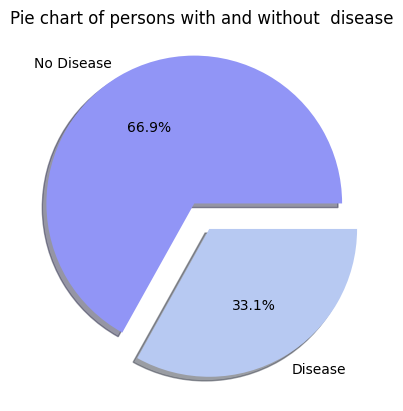

In [16]:
#pie chart of response variable
plt.pie(data['Final'].value_counts(), labels=['No Disease', 'Disease'], colors=['#9195F6', '#B7C9F2'], explode=[0.1,0.1], autopct='%1.1f%%', shadow=True);
plt.title("Pie chart of persons with and without  disease");

1	Confirmed
2	Not detected
## There is a class inbalance in this data set we need to address that issue

## Note

This pie chart illustrate, that the response variable is quite imbalanced which leads to biased prediction towards majority class.After applying SMOTE ,UPSAMPLING and DOWNSAMPLING to obtained balanced data  and to get rid of the issue of imbalanceness of the response variable,the train accuracy and test accuracies are getting lower. and also the gap between those to values are also increased .
Therefore it can be concluded that the model where non of the above sampling methods were accurately predict the unseen data set tan Original data set

In [17]:
#  print("Categorical Variables:", categorical_vars)

In [18]:
# print("Continuous Variables:", continuous_vars)

## Univariate analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


present_continuous_vars = [var for var in continuous_vars if var in data.columns]

num_cols = 2

num_rows = (len(present_continuous_vars) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

for i, var in enumerate(present_continuous_vars):
    # Histogram
    sns.histplot(data[var], ax=axes[i*num_cols], kde=True)
    axes[i*num_cols].set_title(f'Histogram of {var}')
    axes[i*num_cols].set_xlabel(var)
    axes[i*num_cols].set_ylabel('Frequency')
    
    # Boxplot
    sns.boxplot(data[var], ax=axes[i*num_cols+1])
    axes[i*num_cols+1].set_title(f'Boxplot of {var}')
    axes[i*num_cols+1].set_xlabel(var)
    axes[i*num_cols+1].set_ylabel('')
    

plt.tight_layout()
plt.show()


IndexError: index 248 is out of bounds for axis 0 with size 248

In [ ]:
## We can see that most of the distributions are skewed hence we need to scale the variables before applying dimension reduction techniques such as PCA  or model fitting

## Note

Since the variables shows skewed distributions,
seperate models were fitted after applying standurd scaling and without applying standurd scaling.
but the model where fitted after applying standurd scaling provide a higher accuracy


univariate analysis for catergorical variables

In [ ]:
## MOST OF THE VARIABLES ARE BINARY CLASS CATERGORICAL VARIABLES  WITH REPREENTING CLASS 2 MOST OF THE TIME NEGETIVE OF THE ATTRIBUTE

## Bivariate Distribution

In [ ]:

class_2_data = data[data['Final'] == 2]
class_1_data = data[data['Final'] == 1]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))


sns.kdeplot(class_2_data['Age'], color='blue', shade=True, label='No disease')
sns.kdeplot(class_1_data['Age'], color='purple', shade=True, label='Disease')


plt.title('Age Distribution for Class 1 (Confirmed) and Class 2 (Not confirmed)')
plt.xlabel('Age')
plt.ylabel('Density')

plt.legend()


plt.show()


In [ ]:
# Approximately moew old people are suffering from dicease,younger people are less likely to suffering from the dicease byt there is a bpeak for Disease patients arount Age is 40

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))


sns.kdeplot(class_2_data['Income'], color='blue', shade=True, label='No disease')
sns.kdeplot(class_1_data['Income'], color='purple', shade=True, label='Disease')


plt.title('Income Distribution for Class 1 and Class 2')
plt.xlabel('Income')
plt.ylabel('Density')


plt.legend()


plt.show()


In [ ]:
# Approximately moew old people are suffering from dicease,younger people are less likely to suffering from the dicease byt there is a bpeak for Disease patients arount Age is 40

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt




sns.set(style="whitegrid")


plt.figure(figsize=(8, 5))


sns.kdeplot(class_2_data['WBCcount'], color='blue', shade=True, label='No disease')


sns.kdeplot(class_1_data['WBCcount'], color='purple', shade=True, label='Disease')


plt.title('WBCcount Distribution for Class 1 and Class 2')
plt.xlabel('WBCcount')
plt.ylabel('Density')


plt.legend()


plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cross_tab_prop = pd.crosstab(index=data['Sex'],
                             columns=data['Final'],
                             normalize="index")
print(cross_tab_prop)

cross_tab = pd.crosstab(index=data['Sex'],
                        columns=data['Final'])
print(cross_tab)

custom_colors = ['#1f77b4', '#9467bd']

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=custom_colors, 
                    figsize=(10, 6))

plt.legend(title='Final')
plt.xlabel("Sex")
plt.ylabel("Proportion")
plt.title("Distribution of Final Outcomes by Sex")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        
# Show plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


cross_tab_prop = pd.crosstab(index=data['Ethnicity'],
                             columns=data['Final'],
                             normalize="index")
print(cross_tab_prop)


cross_tab = pd.crosstab(index=data['Ethnicity'],
                        columns=data['Final'])
print(cross_tab)

custom_colors = ['#1f77b4', '#9467bd'] 


cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    color=custom_colors, 
                    figsize=(10, 6))


plt.legend(title='Final')
plt.xlabel("Ethnicity")
plt.ylabel("Proportion")
plt.title("Distribution of Final Outcomes by Ethnicity")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
        
# Show plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


custom_palette = ["#1f77b4", "#9467bd"]


var = 'Age'


sns.boxplot(x='Final', y=var, data=data, hue='Final', palette=custom_palette)


plt.xlabel("Final Outcome")
plt.ylabel("Age")
plt.title("Distribution of Age by Final Outcome")


plt.show()


In [ ]:
data

In [ ]:
## CHECKING THE ASSOCIATION BETWEEN CATERGORICAL VARIABLES AND TARGET VARIABLE
## IDENTIFY TOP 10 SIGNIFICENT VARIABLES

In [ ]:
# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
# List to store results
results = []




# Iterate through each categorical variable and calculate association
for column in categorical_vars:
    if column != 'Final':
        confusion_matrix = pd.crosstab(data['Final'], data[column])
        
        # Check if the confusion matrix is valid
        if confusion_matrix.size == 0 or np.any(confusion_matrix.sum(axis=1) == 0) or np.any(confusion_matrix.sum(axis=0) == 0):
            print(f"Skipping variable '{column}' due to invalid contingency table.")
            continue
        
        chi2, p, dof, expected = chi2_contingency(confusion_matrix)
        cramer_v_value = cramers_v(confusion_matrix)
        
        results.append({
            'Explanatory Variable': column,
            'Chi-Square Statistic': chi2,
            'p-value': p,
            'Cramér\'s V': cramer_v_value
        })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

print(f'Total Variables: {data.shape[1]}')
print(f'Categorical Variables: {len(categorical_vars)} -> {categorical_vars}')
print(f'Continuous Variables: {len(continuous_vars)} -> {continuous_vars}\n')
print(results_df)


In [ ]:
# Filter out significant variables at 5% level
significant_results = results_df[results_df['p-value'] < 0.05]

print("Significant Variables at 5% level:")
print(significant_results)


In [ ]:
# These are the significent variables at 5% significent  level

In [ ]:
## Most important top 10  significent catergorical variables

In [ ]:
# Sort the results DataFrame by the 'p-value' column in ascending order
results_df_sorted = results_df.sort_values(by='p-value')

# Select the top 5 most significant variables
top_5_significant_variables = results_df_sorted.head(10)

# Print the top 5 significant variables
print("Top 5 Most Significant Variables:")
print(top_5_significant_variables)


In [ ]:
## SEPERATING INSIGNIFICENT AND SIGNINFICENT CATERFGORICAL VARIABLES INTO 2 PARTS

In [ ]:
# Split variables into significant and non-significant groups
significant_variables = significant_results['Explanatory Variable'].tolist()
non_significant_variables = results_df[~results_df['Explanatory Variable'].isin(significant_variables)]['Explanatory Variable'].tolist()

print("Significant Variables:")
print(significant_variables)
print("\nNon-Significant Variables:")
print(non_significant_variables)


EVENTHOUGH THER ARE INSIGNIFICENT AT 5% INSIGNIFICENT WE CANNOT DIRECTLY REMOVE THEM.
WE TRY TO COMBINE SEVERAL INSIGNIFICENT VARIABLES ANDCHECK WETHER THEY ARE SIGNIFICENT

In [ ]:
# List of variable names
colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
            'Photophobia','Confusion','Cough','Haemoptysis','SOB','Chestpain','Bleeding']

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


## headache

In [ ]:
import pandas as pd

# List to store column names starting with "Headache"
headache_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Headache'):
        headache_columns.append(column_name)

# Print the column names starting with "Headache"
print("Columns starting with 'Headache':", headache_columns)
# List of variable names
colnames = headache_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")



In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from head ache

## fever

In [ ]:
import pandas as pd

# List to store column names starting with "Fever"
fever_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Fever'):
        fever_columns.append(column_name)

# Print the column names starting with "Fever"
print("Columns starting with 'Fever':", fever_columns)

# List of variable names
colnames = fever_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = fever_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### Most of These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from fever

## chills

In [ ]:
import pandas as pd


# List to store column names starting with "Chills"
chills_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Chills'):
        chills_columns.append(column_name)

# Print the column names starting with "Chills"
print("Columns starting with 'Chills':", chills_columns)

# List of variable names
colnames = chills_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = chills_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from chills

## Rigors

In [ ]:
import pandas as pd


# List to store column names starting with "Rigors"
rigors_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Rigors'):
        rigors_columns.append(column_name)

# Print the column names starting with "Rigors"
print("Columns starting with 'Rigors':", rigors_columns)

# List of variable names
colnames = rigors_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = rigors_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

In [ ]:
## Musclepain

In [ ]:
import pandas as pd



# List to store column names starting with "Musclepain"
musclepain_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Musclepain'):
        musclepain_columns.append(column_name)

# Print the column names starting with "Musclepain"
print("Columns starting with 'Musclepain':", musclepain_columns)

# List of variable names
colnames = musclepain_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = musclepain_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Mustender

In [ ]:
import pandas as pd


# List to store column names starting with "Mustender"
mustender_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Mustender'):
        mustender_columns.append(column_name)

# Print the column names starting with "Mustender"
print("Columns starting with 'Mustender':", mustender_columns)

# List of variable names
colnames = mustender_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = mustender_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Nausea

In [ ]:
import pandas as pd



# List to store column names starting with "Nausea"
nausea_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Nausea'):
        nausea_columns.append(column_name)

# Print the column names starting with "Nausea"
print("Columns starting with 'Nausea':", nausea_columns)

# List of variable names
colnames = nausea_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = nausea_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Vomiting

In [ ]:
import pandas as pd



# List to store column names starting with "Vomiting"
vomiting_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Vomiting'):
        vomiting_columns.append(column_name)

# Print the column names starting with "Vomiting"
print("Columns starting with 'Vomiting':", vomiting_columns)

# List of variable names
colnames = vomiting_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = vomiting_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Photophobia

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Photophobia"
photophobia_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Photophobia'):
        photophobia_columns.append(column_name)

# Print the column names starting with "Photophobia"
print("Columns starting with 'Photophobia':", photophobia_columns)

# List of variable names
colnames = photophobia_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = photophobia_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Confusion

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Confusion"
confusion_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Confusion'):
        confusion_columns.append(column_name)

# Print the column names starting with "Confusion"
print("Columns starting with 'Confusion':", confusion_columns)

# List of variable names
colnames = confusion_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = confusion_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Cough

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Cough"
cough_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Cough'):
        cough_columns.append(column_name)

# Print the column names starting with "Cough"
print("Columns starting with 'Cough':", cough_columns)

# List of variable names
colnames = cough_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = cough_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Haemoptysis

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Haemoptysis"
haemoptysis_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Haemoptysis'):
        haemoptysis_columns.append(column_name)

# Print the column names starting with "Haemoptysis"
print("Columns starting with 'Haemoptysis':", haemoptysis_columns)

# List of variable names
colnames = haemoptysis_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = haemoptysis_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## SOB

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "SOB"
sob_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('SOB'):
        sob_columns.append(column_name)

# Print the column names starting with "SOB"
print("Columns starting with 'SOB':", sob_columns)

# List of variable names
colnames = sob_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = sob_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Chestpain

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Chestpain"
chestpain_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Chestpain'):
        chestpain_columns.append(column_name)

# Print the column names starting with "Chestpain"
print("Columns starting with 'Chestpain':", chestpain_columns)

# List of variable names
colnames = chestpain_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = chestpain_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

## Bleeding

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame variable
# Replace 'df' with your actual DataFrame variable name
# For example: df = pd.read_csv('your_dataset.csv')

# List to store column names starting with "Bleeding"
bleeding_columns = []

# Iterate through column names
for column_name in data.columns:
    if column_name.startswith('Bleeding'):
        bleeding_columns.append(column_name)

# Print the column names starting with "Bleeding"
print("Columns starting with 'Bleeding':", bleeding_columns)

# List of variable names
colnames = bleeding_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable and display p-value
for variable in colnames:
    result_row = provided_results[provided_results['Explanatory Variable'] == variable]
    if not result_row.empty:
        p_value = result_row['p-value'].values[0]
        significance = "Significant" if variable in significant_variables else "Not Significant"
        print(f"{variable}: p-value = {p_value}, {significance}")
    else:
        print(f"{variable}: Variable not found in results")

# List of variable names
colnames = bleeding_columns

# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
### These variables are not independetly significent for the response Therefore We are combining those variables into a single varianle as it represent the number of days that a person suffering from this illness

In [ ]:
## Since all this variables are non significent we are goug to recode this

In [ ]:
col_names = {'Muscletendernessonset': 'Mustenderonset', 'Muscletendernessad':'Mustenderad', 'Vomitingadmission':'Vomitingad','Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset','Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad' }
data.rename(columns = col_names, inplace=True)

In [ ]:
# combine some symtoms binary columns as counts

colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
            'Photophobia','Confusion','Cough','Haemoptysis','SOB','Chestpain','Bleeding']
for col in colnames:
  df = data[[col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  data[col+'Days'] = df['Days']
  data.drop([col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [ ]:
# Now I have combined several insignificent vars abd created avariables
# Example instead of Headacheonset,Headache2 Headache3...... created HeadacheDays

In [ ]:
data

In [ ]:
data['HeadacheDays']

In [ ]:
data.shape

In [ ]:
## Now we can see that total of 806 variables has reduced to 575

In [ ]:
# List of symptom column names
colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash',
            'Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice','Photophobia','Confusion','Cough',
            'Haemoptysis','SOB','Chestpain','Bleeding']

# List to store newly created variable names
new_variables = []

# Iterate through each symptom
for col in colnames:
    # Append the new variable name to the list if it exists in the DataFrame
    new_var_name = col + 'Days'
    if new_var_name in data.columns:
        new_variables.append(new_var_name)

# Print the newly created variable names
print("Newly created variables:", new_variables)


In [ ]:
data.shape

In [ ]:
#combine Psychoticsymptoms binary columns as counts

col_names = {'Hepatictendernessad':'hepatictenderad', 'Hepatomegalyad':'hepatomegalyad', 'Spleenimegalyad':'Spleenomegalyad', 'Lympadenopathyad':'Lymphadenopathyad'}
data.rename(columns = col_names, inplace=True)
colnames = ['hepatictender','hepatomegaly','Spleenomegaly','Lymphadenopathy', 'Neckstiffness']
for col in colnames:
  df = data[[col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  data[col+'Days'] = df['Days']
  data.drop([col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [ ]:
data.shape

In [ ]:
## Done the same thing for other set of variables and reduced the count to 530

In [ ]:
# List of variable names


cols = ['HomeStreamrivercanaloranyotherrunningwatersource', 
        'WorkplaceStreamrivercanaloranyotherrunningwatersource',
        'Homepondlaketankoranyotherstagnantwatersource',
        'WorkPlacepondlaketankoranyotherstagnantwatersource']

colnames = cols
# Filter the provided variables from results_df
provided_results = results_df[results_df['Explanatory Variable'].isin(colnames)]

# Check significance for each variable
for variable in colnames:
    significance = "Significant" if variable in significant_variables else "Not Significant"
    print(f"{variable}: {significance}")


In [ ]:
# We further merge insignificent but seems inter-relatedvariables

In [ ]:
#combine water area column

cols = ['HomeStreamrivercanaloranyotherrunningwatersource', 
        'WorkplaceStreamrivercanaloranyotherrunningwatersource',
        'Homepondlaketankoranyotherstagnantwatersource',
        'WorkPlacepondlaketankoranyotherstagnantwatersource']
       
anyWaterArea = data[cols]

def water_area(row):
    if row.isnull().all():
        return pd.NA
    elif (row == 1).any():
        return 1
    else:
        return 2

data['anyWaterArea'] = anyWaterArea.apply(water_area, axis=1)

data.drop(cols, axis = 1, inplace = True)



In [ ]:
data

In [ ]:
data.shape

In [ ]:
## Now the variables count has decreased upto 527

In [ ]:
missing_percentage = data.isna().mean() * 100

# Determine columns to drop based on the threshold
columns_to_drop_1 = missing_percentage[missing_percentage > 80].index

# Drop columns with more than 50% missing values
data = data.drop(columns_to_drop_1, axis=1)

In [ ]:
data.shape

In [ ]:
## We have observed that some of the column contains missing values we remove columns which has more than 80% missing values

In [ ]:
data.info(all)

In [ ]:
cat_columns_to_convert = ['Year','Month','Hospital','Sample','ICU','OPD','Sex',
                          'Ethnicity','Education','TertiaryEducation','Prophylactics',
                          'Pasttreatments','Pastantibiotics','Chronicillness',
                          'Possibleexposure','Psychoticsymptomsonset','Psychoticsymptomsad',
                          'WPqPCRDiagnosis','Isolate','MAT_set_1','Final']

data[cat_columns_to_convert] = data[cat_columns_to_convert].astype('category')


In [ ]:
data.describe()

## checking and impute missing values 

In [ ]:
data.isna().sum()

In [ ]:
columns_with_missing_values = data.columns[data.isna().any()]
print(columns_with_missing_values)


In [ ]:
impute_train= data.copy()
impute_train = impute_train.fillna(impute_train.mode().iloc[0])


In [ ]:
columns_with_missing_values = impute_train.columns[impute_train.isna().any()]
print(columns_with_missing_values)


In [ ]:
impute_train.isna().sum()

In [ ]:
impute_train.info(all)

In [ ]:
impute_train

## Identifying multicolinearity exist in the data set

In [ ]:
# List of continuous variables present in data
present_continuous_vars = set(continuous_vars) & set(data.columns)

# Print the continuous variables present in data
print("Continuous variables present in data:")
print(present_continuous_vars)


In [ ]:
# List of continuous variables present in data
present_continuous_vars = set(continuous_vars) & set(data.columns)

# Print the continuous variables present in data
print("Continuous variables present in data:")
print(present_continuous_vars)

# Check if any continuous variable is not present in data
missing_continuous_vars = set(continuous_vars) - set(data.columns)
if missing_continuous_vars:
    print("Continuous variables not present in data:", missing_continuous_vars)
else:
    print("All continuous variables are present in data.")


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# List of continuous variables present in data
present_continuous_vars_list = list(present_continuous_vars)

# Subset data for continuous variables
data_subset = data[present_continuous_vars_list]

# Handle missing and infinite values
data_subset.replace([np.inf, -np.inf], np.nan, inplace=True)
data_subset.dropna(inplace=True)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = present_continuous_vars_list
vif_data["VIF"] = [variance_inflation_factor(data_subset.values, i) for i in range(data_subset.shape[1])]

# Filter variables with VIF greater than 5 or 10 (adjust threshold as needed)
highly_multicollinear_vars = vif_data[vif_data["VIF"] > 5]  # You can change the threshold here
print("Highly Multicollinear Variables:")
print(highly_multicollinear_vars)


In [ ]:
##  infinite variance inflation factors (VIF), which suggests perfect multicollinearity.  Hence we need to apply dimension reduction techniques such as PCA 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data[list(present_continuous_vars)].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
## We can see multicolineairty exist in our data set hence we need to apply any dimension rediction techniques

## *******************************************************************************************

In [ ]:
impute_train.shape

In [ ]:
impute_train

In [ ]:
# Initialize counters
categorical_vars = []
continuous_vars = []

# Loop through each column to classify
for column in impute_train.columns:
    # Get the number of unique values
    unique_values = impute_train[column].nunique()
    
    # Classify based on data type and number of unique values
    if impute_train[column].dtype == 'object' or unique_values < 10:
        categorical_vars.append(column)
    else:
        continuous_vars.append(column)

# Get the counts
num_categorical_vars = len(categorical_vars)
num_continuous_vars = len(continuous_vars)

# Output the results
print(f'Total Variables: {impute_train.shape[1]}')
print(f'Categorical Variables: {num_categorical_vars}')
print(f'Continuous Variables: {num_continuous_vars}')

In [ ]:
impute_train[continuous_vars]


In [ ]:
impute_train[categorical_vars]

In [ ]:
impute_train

In [ ]:
## TEST TRAIN SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X = impute_train.drop(columns=['Final'])
y = impute_train['Final']

#20% allocated for test data and 80% for train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)#train data
train = pd.concat([X_train, y_train], axis=1)
#test data
test = pd.concat([X_test, y_test], axis=1)




In [ ]:
train.shape


In [ ]:
test.shape

In [ ]:
X_train[continuous_vars]

# Clustering Approach

## KPrototype CLustering 

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.metrics import silhouette_score
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

wcss = []  # within-cluster sum of squares
silhouette_scores = []

# Assuming categorical_vars is a list of indices of the categorical columns
categorical_vars = [1, 2, 3]  # Example indices for categorical variables

for k in range(2, 11):
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=1, verbose=0, random_state=28)
    clusters = kproto.fit_predict(X_train, categorical=categorical_vars)

    # Calculate within-cluster sum of squares (WCSS)
    wcss.append(kproto.cost_)

    # Calculate silhouette score
    # Note: The silhouette_score function might not work directly with mixed data types.
    # You may need to compute it in a custom way if the default doesn't support KPrototypes outputs.
    try:
        silhouette_score_val = silhouette_score(X_train, clusters, metric='euclidean')
        silhouette_scores.append(silhouette_score_val)
    except Exception as e:
        silhouette_scores.append(None)
        print(f"Silhouette score calculation failed for k={k} with error: {e}")

    print(f"Completed for k={k}")

# Elbow curve for WCSS
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k (WCSS)')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

# Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
from kmodes.kprototypes import KPrototypes
import numpy as np

# Number of clusters
n_clusters = 4

# Initialize KPrototypes
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', n_init=1, verbose=2)

# Fit the model to the data, specifying the categorical predictors
clusters = kproto.fit_predict(X_train, categorical=categorical_vars)

# Print cluster centroids and labels
print("Cluster Centroids:")
print(kproto.cluster_centroids_)
print("\nCluster Labels:")
print(kproto.labels_)

# Assuming 'clusters' contains the cluster labels
cluster_counts = np.bincount(clusters)

# Print the counts of observations in each cluster
for cluster_id, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_id}: {count} observations")


In [ ]:
np.random.seed(28)

n_clusters = 4
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', n_init=1, verbose=2)

#fit model to data
clusters = kproto.fit_predict(X_train, categorical=categorical_vars) #specify categorical predictor

#print cluster centroids and labels
print("Cluster Centroids:")
print(kproto.cluster_centroids_)
print("\nCluster Labels:")
print(kproto.labels_)

In [ ]:
np.random.seed(28)

def plot_silhouette(X, clusters):
    silhouette_vals = silhouette_samples(X, clusters)
    n_clusters = len(np.unique(clusters))
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[clusters == i]
        cluster_silhouette_vals.sort()

        size_cluster_i = cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.tab10(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    silhouette_avg = silhouette_score(X, clusters)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    ax.text(silhouette_avg + 0.005, 0.5 * len(X), 'Average Silhouette Score: {:.2f}'.format(silhouette_avg), color="red")
    ax.set_title("Silhouette Plot for Clusters")

    plt.show()

plot_silhouette(X_train, clusters)

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the average silhouette value
silhouette_avg = silhouette_score(X_train, clusters)
print("Average Silhouette Value:", silhouette_avg)


## Important Notes


